<a href="https://colab.research.google.com/github/lanonk/ANN_for_predicting_bike_prices/blob/main/fstarter_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [ ]:
bikes.head(6)

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
5,1/1/11,1,5,0,0,2,0.75,6,3.28,1.0016,0,1


In [ ]:
# import datetime
# from matplotlib.finance import date2num

# float_days = date2num(datetime.datetime.strptime(date_string, '%Y%m%d%H%M%S%f')

# bikes = pd.to_datetime(bikes['dteday'])
bikes["dteday"] = pd.to_datetime(bikes['dteday'])
bikes


,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,2012-11-30,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,2012-11-30,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,2012-11-30,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,2012-11-30,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


In [ ]:
bikes["year"] = bikes['dteday'].map(lambda x: x.year)
bikes["day"] = bikes['dteday'].map(lambda x: x.day)
bikes["month"] = bikes['dteday'].map(lambda x: x.month)

In [ ]:
bikes["Rented"] = bikes.casual + bikes.registered
bikes  = bikes.drop(["casual", "registered"], axis=1)
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,year,day,month,Rented
0,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,2011,1,1,16
1,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,2011,1,1,40
2,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,2011,1,1,32
3,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,2011,1,1,13
4,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,2011,1,1,1


Drpping feel like temp and replacing celcius with farenheight


In [ ]:
bikes["temp_f"] = (bikes.temp_c * 9/5) + 32
bikes = bikes.drop(["temp_c", "feels_like_c"],axis=1)
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,year,day,month,Rented,temp_f
0,2011-01-01,1,0,0,0,1,0.81,0,2011,1,1,16,37.904
1,2011-01-01,1,1,0,0,1,0.80,0,2011,1,1,40,36.212
2,2011-01-01,1,2,0,0,1,0.80,0,2011,1,1,32,36.212
3,2011-01-01,1,3,0,0,1,0.75,0,2011,1,1,13,37.904
4,2011-01-01,1,4,0,0,1,0.75,0,2011,1,1,1,37.904


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
y = bikes["Rented"]
bikes_x = bikes.drop(["Rented","dteday"],axis=1)

scaler = MinMaxScaler()

scaler.fit(bikes_x)

X = pd.DataFrame(scaler.transform(bikes_x))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Initializing ANN

In [ ]:
ann = tf.keras.models.Sequential()

## Adding the input layer and first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation ="relu" ))

### Adding second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=150, activation = "relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=150, activation = "relu"))

### Adding output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

### Compliling Ann


In [ ]:
# ann.compile(optimizer="adam", loss="mean_absolute_error", metrics=["mean_squared_error", "accuracy", "mean_absolute_error"])
ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss="mean_absolute_error", metrics=["mean_squared_error", "accuracy", "mean_absolute_error"])


### Training

In [ ]:
history = ann.fit(X_train, y_train, batch_size=90, epochs=50, validation_split=.20, verbose = 0)

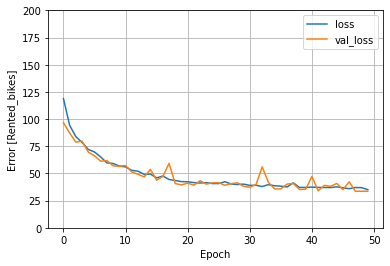

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rented_bikes]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
ann.evaluate(X_test,y_test)

104/104 [==============================] - 0s 2ms/step - loss: 34.6548 - mean_squared_error: 2833.2515 - accuracy: 0.0102 - mean_absolute_error: 34.6548


[34.654808044433594,
 2833.25146484375,
 0.010216346010565758,
 34.654808044433594]

### Correlation

In [ ]:
import altair as alt

corr_rented = pd.DataFrame(bikes.corr().Rented).reset_index()

alt.Chart(corr_rented.drop([10])).mark_bar().encode(
    alt.X("index", sort= "-y"),
    alt.Y("Rented")
).properties(width=500)

alt.Chart(...)